### 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

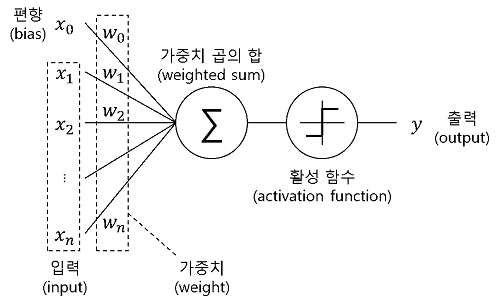

In [ ]:
import numpy as np

In [5]:
class Perceptron(object):
    def __init__(self, eta= 0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target -self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int(update != 0.0)
                
            self.errors_.append(errors)
            
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [7]:
Perceptron(0.01, 50)

In [16]:
1.0/ 3.0

0.3333333333333333

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

In [72]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [73]:

#s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

path = '../ch2/dataset/iris.data.csv'
df = pd.read_csv(path, header=None, encoding='utf-8')

In [74]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [76]:
x = df.iloc[0:100, [0, 2]].values
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

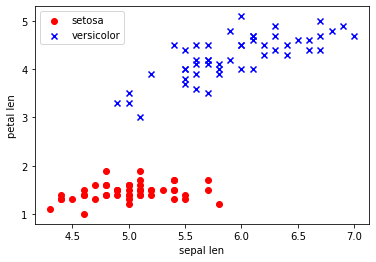

In [77]:
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal len')
plt.ylabel('petal len')
plt.legend(loc='upper left')
plt.show()

In [78]:
ppn = Perceptron(eta = 0.1, n_iter= 10)
ppn.fit(x, y)

[ 0.01624345 -0.00611756 -0.00528172]


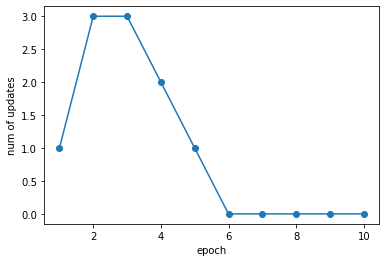

In [79]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('num of updates')
plt.show()

In [120]:
def plot_decision_regions(X, y, classifier, resolution= 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor='black'
                   )

C:\Users\HPE\AppData\Local\Temp/ipykernel_9968/923983286.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


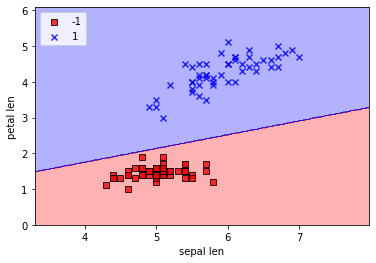

In [121]:
plot_decision_regions(x, y, classifier=ppn)

plt.xlabel('sepal len')
plt.ylabel('petal len')
plt.legend(loc='upper left')
plt.show()

### 2.3.2 파이썬으로 아달린 구현

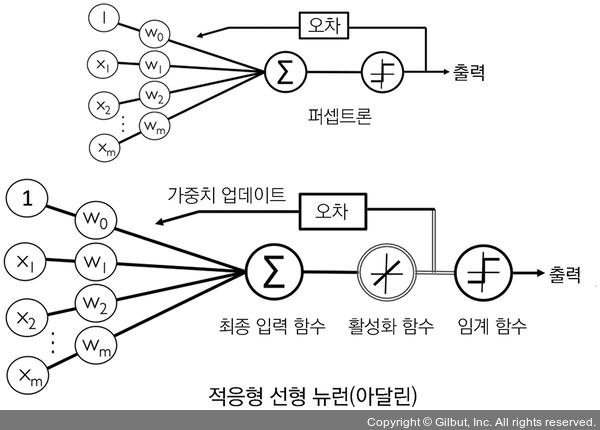

In [110]:
class AdalineGD(object):

    def __init__(self, eta= 0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = y - output
            
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
                
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def activation(self, x):
        return x
    
    def predict(self, x):
        return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

Text(0.5, 1.0, 'adaline - learning rate 0.0001')

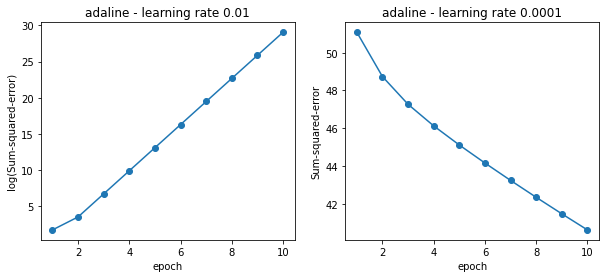

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('adaline - learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('adaline - learning rate 0.0001')

### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

In [115]:
x_std = np.copy(x)
x_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

C:\Users\HPE\AppData\Local\Temp/ipykernel_9968/923983286.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


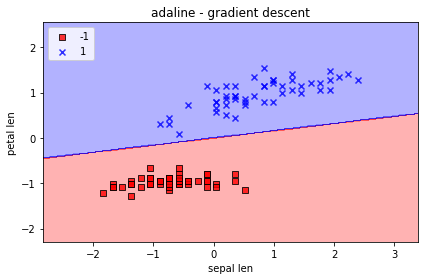

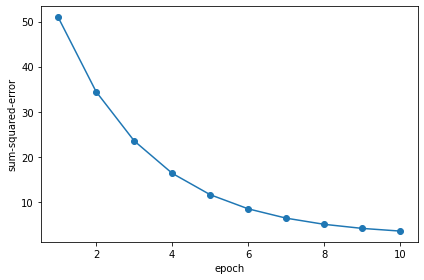

In [127]:
ada = AdalineGD(n_iter=10, eta=0.01)
ada.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada)
plt.title('adaline - gradient descent')
plt.xlabel('sepal len')
plt.ylabel('petal len')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('sum-squared-error')
plt.tight_layout()
plt.show()

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

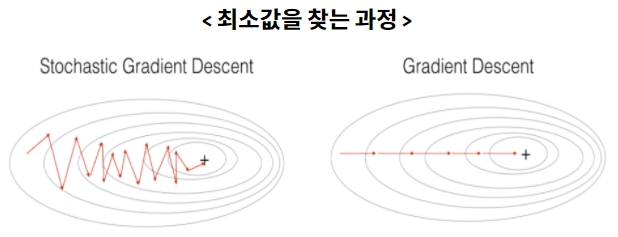

In [144]:
class AdalineGD_ADD(object):

    def __init__(self, eta= 0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, x, y):
        self._initialize_weights(x.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                x, y = self._shuffle(x, y)
            cost = []
            for xi, target in zip(x, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            
        return self
    
    def partial_fit(self, x, y):
        if not self.w_initialized:
            self._initialize_weights(x.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(x, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x, y)
            
        return self
    
    def _shuffle(self, x ,y):
        r = self.rgen.permutation(len(y))
        return x[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=1+m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = target - output
        
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta * error
            
        cost = (error**2) / 2.0
        
        return cost
                
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def activation(self, x):
        return x
    
    def predict(self, x):
        return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

C:\Users\HPE\AppData\Local\Temp/ipykernel_9968/923983286.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


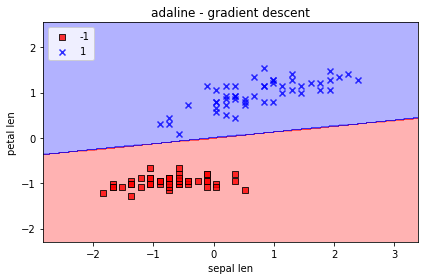

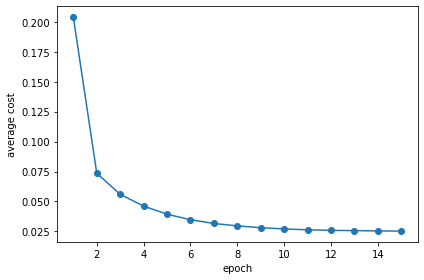

In [145]:
ada = AdalineGD_ADD(n_iter=15, eta=0.01, random_state=1)
ada.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada)
plt.title('adaline - gradient descent')
plt.xlabel('sepal len')
plt.ylabel('petal len')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('average cost')
plt.tight_layout()
plt.show()

C:\Users\HPE\AppData\Local\Temp/ipykernel_9968/923983286.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


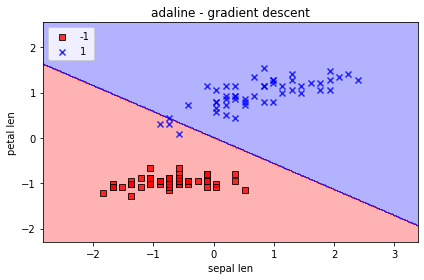

AttributeError: 'AdalineGD_ADD' object has no attribute 'cost_'

In [149]:
ada = AdalineGD_ADD(n_iter=15, eta=0.01, random_state=1)

ada.partial_fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada)
plt.title('adaline - gradient descent')
plt.xlabel('sepal len')
plt.ylabel('petal len')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('epoch')
plt.ylabel('average cost')
plt.tight_layout()
plt.show()